## Table of Contents

In [1]:
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Splitting the data
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
boston_data = pd.read_csv('boston.csv')

## 1 Building a decision tree model

In [3]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In this Notebook you will work with a [Boston housing dataset](!https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In this notebook we are going to build models to predict house prices (MEDV).


In [4]:
# X and y
columns = ['CRIM', 'INDUS', 'CHAS', 'LSTAT']

more_columns = boston_data.drop(['ZN', 'MEDV'], axis=1)

In [5]:
more_columns.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:

X = boston_data[more_columns.columns]
y = boston_data['MEDV']

In [7]:
# Split X and y into train and test datasets. Using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
X_train.shape, X_test.shape

((354, 12), (152, 12))

In [9]:
# Initiate the model
tree = DecisionTreeRegressor()

In [10]:
# train the model on the train dataset
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
y_pred_train = tree.predict(X_train)

In [12]:
y_pred_test = tree.predict(X_test)

In [13]:
y_train.head()

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
Name: MEDV, dtype: float64

In [14]:
r2_score(y_pred_train, y_train)

1.0

In [15]:
y_test.head()

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: MEDV, dtype: float64

In [16]:
r2_score(y_pred_test, y_test)

0.8054857558216131

In [17]:
from sklearn.tree import plot_tree

[Text(0.5023933107061318, 0.9705882352941176, 'LSTAT <= 9.545\nsquared_error = 81.189\nsamples = 354\nvalue = 22.34'),
 Text(0.25829664057403784, 0.9117647058823529, 'RM <= 7.435\nsquared_error = 78.714\nsamples = 136\nvalue = 29.99'),
 Text(0.15488421395955643, 0.8529411764705882, 'DIS <= 1.485\nsquared_error = 45.062\nsamples = 117\nvalue = 27.666'),
 Text(0.15227495107632094, 0.7941176470588235, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.1574934768427919, 0.7941176470588235, 'RM <= 6.542\nsquared_error = 28.375\nsamples = 113\nvalue = 26.875'),
 Text(0.06547619047619048, 0.7352941176470589, 'RM <= 6.132\nsquared_error = 11.126\nsamples = 53\nvalue = 22.892'),
 Text(0.02136333985649054, 0.6764705882352942, 'LSTAT <= 7.41\nsquared_error = 7.679\nsamples = 23\nvalue = 20.765'),
 Text(0.007827788649706457, 0.6176470588235294, 'LSTAT <= 6.85\nsquared_error = 3.794\nsamples = 5\nvalue = 23.92'),
 Text(0.005218525766470972, 0.5588235294117647, 'B <= 370.37\nsquared_error = 

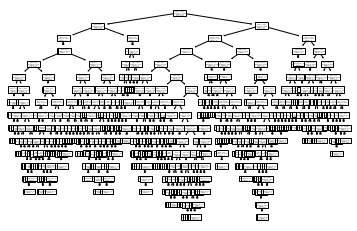

In [18]:
plot_tree(tree, feature_names=X.columns)

In [53]:
# model 2
tree2 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [54]:
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

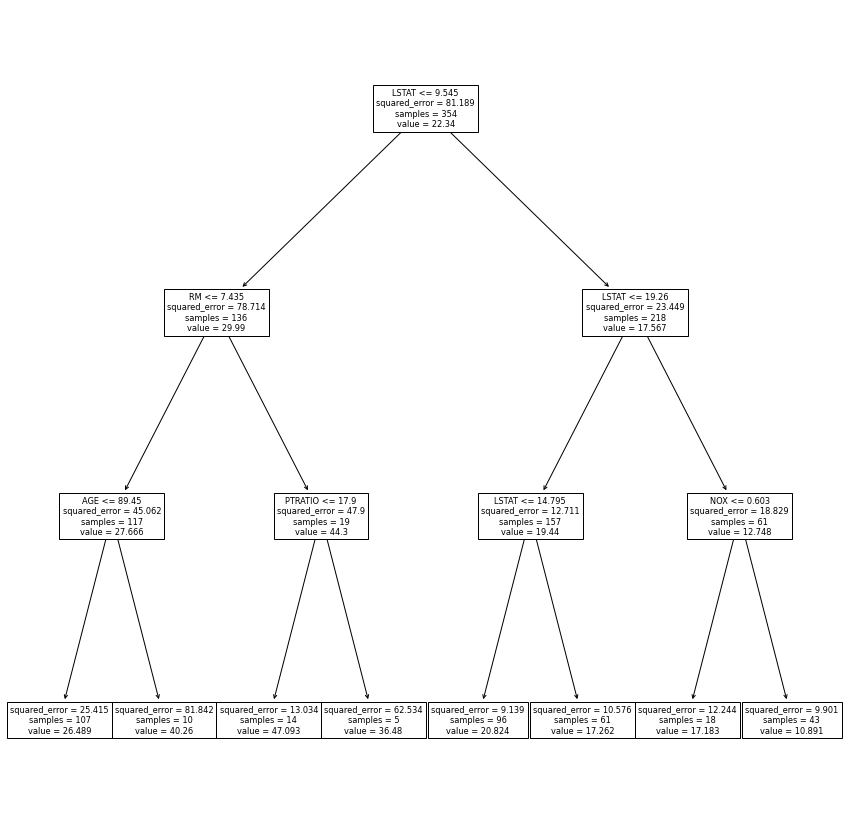

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(tree2, feature_names=X.columns)
plt.savefig('tree2.svg')
plt.show()


In [56]:
y_pred_train = tree2.predict(X_train)
y_pred_test = tree2.predict(X_test)

In [57]:
r2_score(y_pred_train, y_train), r2_score(y_pred_test, y_test), mean_squared_error(y_pred_test, y_test, squared=False)

(0.7248538564441542, 0.7142508552419482, 4.732825842345231)

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

r2_score(y_pred_train, y_train), r2_score(y_pred_test, y_test), mean_squared_error(y_pred_test, y_test, squared=False)

(0.5739328150328264, 0.6340987534842442, 4.456677041537147)

In [ ]:
mean_squared_error